[Link](https://www.kaggle.com/competitions/digit-recognizer/data) to Competition

I went through this to get a better understanding of the concepts I've learned so far in fastai. Also to brush up on basic numpy, pandas, etc. I used Ahed Jneed's great notebook [here](https://www.kaggle.com/code/ahedjneed/mnist-with-fastai/notebook) as a guidepost whenever I got stuck.

In [1]:
#|default_exp app

In [2]:
#| export
import os
from pathlib import Path
import pandas as pd
import numpy as np
from fastai.vision.all import *
from fastai.vision.all import Image
from torchvision.utils import save_image
from fastai.callback.all import *

matplotlib.rc('image', cmap='Greys')

In [3]:
#| export
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
creds = ''

In [4]:
#| export
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [5]:
#| export
path = Path('digit-recognizer')

In [6]:
#| export
if not iskaggle and not path.exists():
    import zipfile, kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [7]:
#| export
if iskaggle:
    path = Path('../input/digit-recognizer')
    ! pip install -q dataset

Import Training Set

In [8]:
#| export
train_full = pd.read_csv(path/'train.csv')
test_full = pd.read_csv(path/'test.csv')

In [9]:
im3_array = test_full.iloc[2].values

In [10]:
im3_array.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
im3_tens = tensor(im3_array).reshape(28,28)

In [12]:
im3_tens

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [13]:
df = pd.DataFrame(im3_tens)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,6,100,213,254,245,255,149,17,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,26,181,233,102,40,29,102,166,187,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,57,236,181,35,0,0,0,0,12,207,13,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,27,228,187,0,0,0,0,0,0,96,225,9,0,0,0,0,0,0


In [14]:
#| export
label = train_full.iloc[:, :1]

In [15]:
#| export
image_df = train_full.iloc[:, 1:]

In [16]:
image_df.shape, test_full.shape

((42000, 784), (28000, 784))

In [17]:
#| export
np_image_array = image_df.values
np_test_array = test_full.values

In [18]:
np_test_array.shape, np_image_array.shape

((28000, 784), (42000, 784))

In [19]:
#| export
image_tens = [tensor(x).float() for x in np_image_array]
test_image_tens = [tensor(x).float() for x in np_test_array]

In [20]:
#| export
stacked_img_tens = torch.stack(image_tens).float()/255
stacked_test_tens = torch.stack(test_image_tens).float()/255

In [21]:
#| export
stacked_label_tens = tensor(label).unsqueeze(1)
stacked_test_label_tens = tensor(label).unsqueeze(1)

In [22]:
# img = stacked_img_tens[0].reshape(28, 28)
# save_image(img, './test.png')

In [23]:
#| export
train_path = Path('train')
test_path = Path('test')
def tens_to_img(folder_path, stacked_tensor, labeled=True):
    if not folder_path.exists():
        folder_path.mkdir()
    for i in range(stacked_tensor.shape[0]):
        img = stacked_tensor[i].reshape(28, 28)
        if labeled:
            dest = (folder_path/label['label'][i].astype(str))
        else:
            dest = (folder_path)
        dest.mkdir(exist_ok=True)
        img_path = Path(f"{dest}/{i}.png")
        if not img_path.exists():
            save_image(img, img_path)

In [24]:
#| export
tens_to_img(train_path, stacked_img_tens)
tens_to_img(test_path, stacked_test_tens, labeled=False)

In [25]:
# test_path = Path('test')
# if not folder_path.exists():
#     folder_path.mkdir()
# for i in range(stacked_test_tens.shape[0]):
#     img = stacked_test_tens[i].reshape(28, 28)
#     dest = (folder_path/label['label'][i].astype(str))
#     dest.mkdir(exist_ok=True)
#     img_path = Path(f"{dest}/{i}.png")
#     if not img_path.exists():
#         save_image(img, img_path)

In [26]:
#| export
dls = ImageDataLoaders.from_folder(train_path, get_image_files(train_path), bs=255, valid_pct=0.2, seed=42, label_func=parent_label)

In [27]:
#| export
learn = vision_learner(dls, resnet18, loss_func=F.cross_entropy, metrics=accuracy)

/home/petewin/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/petewin/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
#| export
learn.fine_tune(3, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.566204,0.844966,0.740833,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.523872,0.254561,0.920952,00:06
1,0.212179,0.150488,0.954286,00:06
2,0.116525,0.139813,0.957619,00:06


In [29]:
#| export
def find_lr_metrics(learn):
    lr_min, lr_steep, lr_valley = learn.lr_find(suggest_funcs=(minimum, steep, valley))
    lr_min = f"{lr_min:.2e}"
    lr_steep = f"{lr_steep:.2e}"
    lr_valley = f"{lr_valley:.2e}"
    print(f"Minimum: {lr_min}, Steepest Point {lr_steep}, Valley {lr_valley}")
    return lr_min, lr_steep, lr_valley

Minimum: 3.98e-05, Steepest Point 3.98e-06, Valley 9.12e-05


('3.98e-05', '3.98e-06', '9.12e-05')

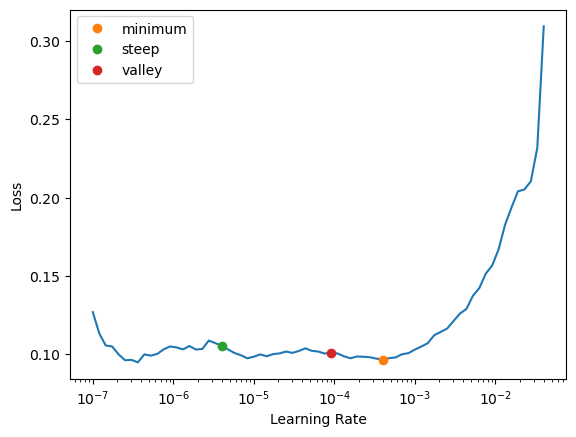

In [30]:
find_lr_metrics(learn)

In [31]:
#| export
learn = vision_learner(dls, resnet18, loss_func=F.cross_entropy, metrics=accuracy).to_fp16()
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.101675,0.460663,0.852738,00:06
1,0.425588,0.247766,0.921905,00:05
2,0.275878,0.225543,0.931548,00:07


Minimum: 1.32e-07, Steepest Point 9.12e-07, Valley 3.02e-03


('1.32e-07', '9.12e-07', '3.02e-03')

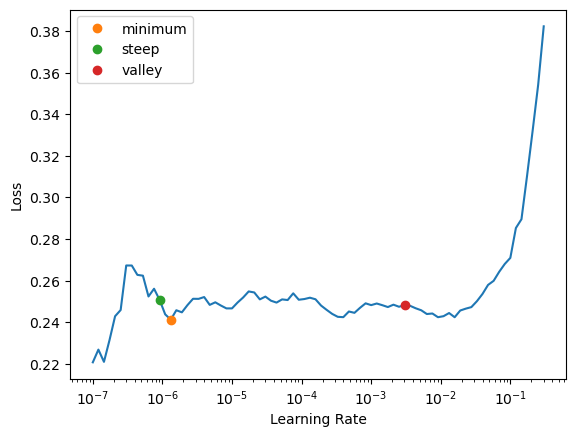

In [32]:
find_lr_metrics(learn)

In [33]:
#| export
learn.unfreeze()

Minimum: 4.37e-04, Steepest Point 7.59e-07, Valley 3.31e-04


('4.37e-04', '7.59e-07', '3.31e-04')

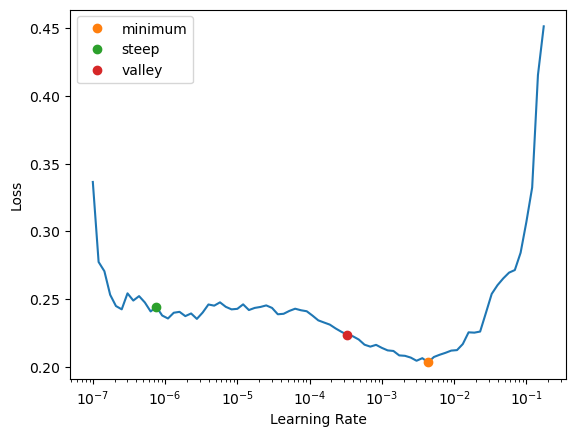

In [34]:
find_lr_metrics(learn)

In [35]:
#| export
learn.fit_one_cycle(10, lr_max=slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.146938,0.084647,0.978929,00:07
1,0.100788,0.069065,0.982381,00:06
2,0.086204,0.070392,0.983214,00:07
3,0.051248,0.050123,0.987500,00:07
4,0.041562,0.061101,0.987024,00:07
5,0.034357,0.048323,0.989524,00:08
6,0.018794,0.038194,0.990833,00:07
7,0.009846,0.032967,0.992738,00:07
8,0.003528,0.035910,0.992619,00:07
9,0.003007,0.033901,0.993572,00:07


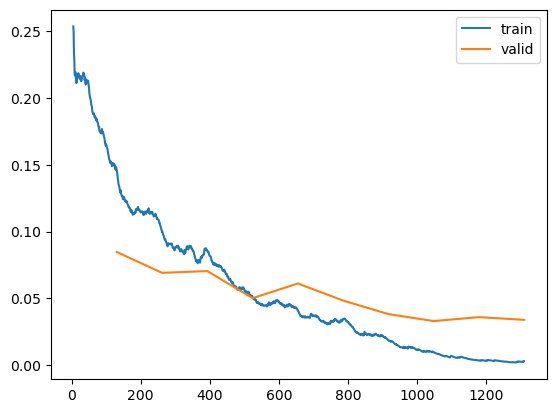

In [36]:
learn.recorder.plot_loss()

In [37]:
#| export
learn.save('model_1')

Path('train/models/model_1.pth')

In [38]:
#| export
path = Path('test')
test_image_files = get_image_files(path)
test_image_files.sort(key=lambda x: int(x.stem))
test_dl = dls.test_dl(test_image_files)

In [39]:
test_image_files

(#28000) [Path('test/0.png'),Path('test/1.png'),Path('test/2.png'),Path('test/3.png'),Path('test/4.png'),Path('test/5.png'),Path('test/6.png'),Path('test/7.png'),Path('test/8.png'),Path('test/9.png')...]

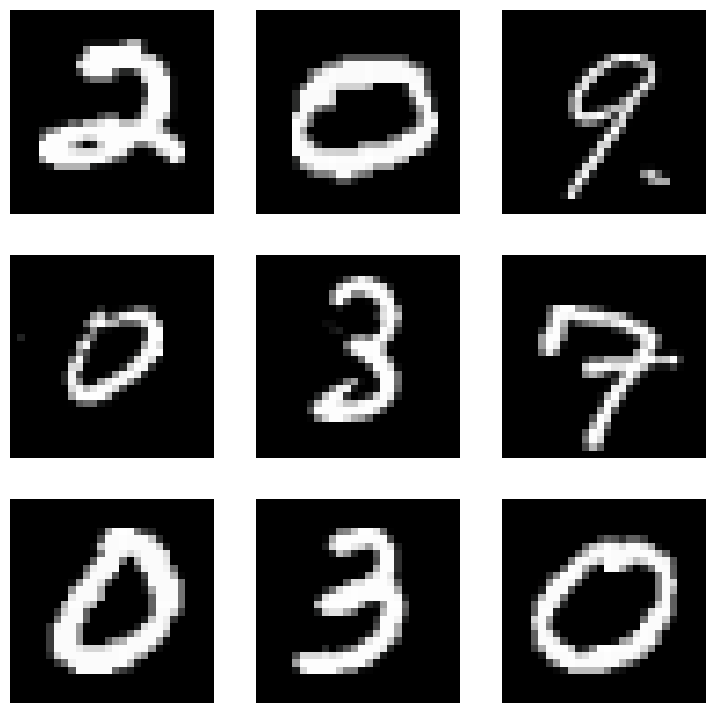

In [40]:
test_dl.show_batch()

In [41]:
preds, _, pred_labels = learn.get_preds(dl=test_dl, with_decoded=True)

In [42]:
preds.shape, pred_labels.shape

(torch.Size([28000, 10]), torch.Size([28000, 10]))

In [43]:
probs = preds[0].tolist()
probs_df = pd.DataFrame({'Image Type': list(range(len(probs))), 'Probability': probs})
probs_df

,Image Type,Probability
0,0,-3.761719
1,1,-4.488281
2,2,18.687500
3,3,-2.701172
4,4,-3.673828
5,5,-5.562500
6,6,-3.535156
7,7,-2.359375
8,8,-1.552734
9,9,-3.271484


In [44]:
preds = np.argmax(preds, axis=1)

In [45]:
preds[9].item()

3

In [46]:
path = Path('digit-recognizer')

In [47]:
df = pd.read_csv(path/'sample_submission.csv')

In [48]:
df.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [49]:
df.tail()

,ImageId,Label
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
27999,28000,0


In [50]:
len(df)

28000

Prediction List

In [51]:
preds[2].item()

9

In [52]:
image_id = [i+1 for i in range(len(df))]
prediction_list = [preds[i].item() for i in range(len(df))]

In [53]:
image_id[-1]

28000

In [54]:
submission_csv = pd.DataFrame({'ImageId': image_id, 'Label': prediction_list})

In [55]:
submission_csv.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [56]:
submission_csv.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [57]:
submission_csv.to_csv("submission.csv", index=False)

In [58]:
display(submission_csv)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [59]:
import nbdev
nbdev.export.nb_export('mnist_classifier.ipynb', 'app')
print('Export successful')

Export successful
